# Imports

In [262]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Parse logs

In [263]:
log_path = './reports/logs/lr_0.005/20220530_031244.log.json'
training_column_names = ['mode', 'epoch', 'iter', 'lr', 'memory', 'data_time', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls', 'acc', 'loss_bbox', 'loss_track', 'loss_track_aux', 'loss', 'time']
with open(log_path, 'r') as file:
    env_info = json.loads(next(file)) # first line contains the environmental info and seed
    lists = []
    for row in file:
        lists.append(json.loads(row))

In [264]:
df = pd.DataFrame.from_records(lists)

# Validation data only has secondary metrics (i.e precision, recall, etc), but training data only has loss (loss_rpn_cls, etc)
val_df = df[df['mode'] == 'val']
train_df = df[df['mode'] == 'train']
train_df = train_df.drop([label for label in df.columns if label not in column_names], axis=1)

display(val_df)
display(train_df)

# assert df
assert train_df.isna().values.any() == False

,mode,epoch,iter,lr,memory,data_time,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,...,FM,track_OVERALL_copypaste,track_AVERAGE_copypaste,bbox_mAP,bbox_mAP_50,bbox_mAP_75,bbox_mAP_s,bbox_mAP_m,bbox_mAP_l,bbox_mAP_copypaste
1080,val,2,39973,0.00500,NaN,NaN,NaN,NaN,NaN,NaN,...,12246.0,0.624 0.505 0.820 76007 129121 13927 0.708 0.8...,0.379 0.155 0.690 76007 129121 13927 0.387 0.5...,0.231,0.416,0.224,0.104,0.257,0.373,0.231 0.416 0.224 0.104 0.257 0.373
2161,val,4,39973,0.00500,NaN,NaN,NaN,NaN,NaN,NaN,...,11776.0,0.640 0.522 0.826 76611 122177 12969 0.724 0.8...,0.425 0.230 0.693 76611 122177 12969 0.427 0.6...,0.268,0.472,0.260,0.115,0.294,0.426,0.268 0.472 0.260 0.115 0.294 0.426
3242,val,6,39973,0.00500,NaN,NaN,NaN,NaN,NaN,NaN,...,12499.0,0.637 0.510 0.825 86624 116968 13362 0.736 0.7...,0.439 0.255 0.696 86624 116968 13362 0.433 0.6...,0.277,0.481,0.280,0.116,0.305,0.441,0.277 0.481 0.280 0.116 0.305 0.441
4323,val,8,39973,0.00500,NaN,NaN,NaN,NaN,NaN,NaN,...,11286.0,0.655 0.553 0.833 61453 125376 11162 0.717 0.8...,0.435 0.270 0.701 61453 125376 11162 0.410 0.6...,0.277,0.478,0.277,0.117,0.309,0.426,0.277 0.478 0.277 0.117 0.309 0.426
5404,val,10,39973,0.00050,NaN,NaN,NaN,NaN,NaN,NaN,...,11606.0,0.677 0.587 0.839 55810 117654 9394 0.734 0.85...,0.473 0.312 0.704 55810 117654 9394 0.452 0.68...,0.304,0.511,0.307,0.127,0.331,0.482,0.304 0.511 0.307 0.127 0.331 0.482
6485,val,12,39973,0.00005,NaN,NaN,NaN,NaN,NaN,NaN,...,12025.0,0.680 0.592 0.840 53918 117332 9254 0.735 0.85...,0.475 0.314 0.704 53918 117332 9254 0.456 0.68...,0.307,0.514,0.308,0.125,0.332,0.486,0.307 0.514 0.308 0.125 0.332 0.486


,mode,epoch,iter,lr,memory,data_time,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,loss_track,loss_track_aux,loss,time
0,train,1,50,0.00025,5880.0,0.50643,0.68874,0.08428,0.62358,93.28613,0.02622,0.30408,0.27999,2.00688,0.92658
1,train,1,100,0.00050,5880.0,0.00698,0.47867,0.07784,0.26610,94.59668,0.13611,0.21862,0.08204,1.25938,0.43509
2,train,1,150,0.00075,5880.0,0.00693,0.23078,0.08274,0.34189,91.07129,0.27936,0.22239,0.09829,1.25545,0.43645
3,train,1,200,0.00100,5880.0,0.00702,0.19317,0.07924,0.29511,91.75293,0.25147,0.16484,0.09738,1.08121,0.43789
4,train,1,250,0.00125,5880.0,0.00731,0.17456,0.07554,0.24594,92.84863,0.21045,0.12404,0.09767,0.92821,0.43525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,train,12,26800,0.00005,5880.0,0.00813,0.01356,0.02078,0.20059,92.21973,0.31321,0.01415,0.01299,0.57529,0.45235
6481,train,12,26850,0.00005,5880.0,0.00844,0.01021,0.01865,0.17971,93.08105,0.29178,0.01837,0.01279,0.53151,0.44895
6482,train,12,26900,0.00005,5880.0,0.00831,0.01202,0.01924,0.18964,92.56445,0.30075,0.01411,0.01157,0.54734,0.45060
6483,train,12,26950,0.00005,5880.0,0.00819,0.01223,0.01961,0.19295,92.59473,0.30318,0.01590,0.01197,0.55585,0.45160


In [265]:
print(val_df.columns)

Index(['mode', 'epoch', 'iter', 'lr', 'memory', 'data_time', 'loss_rpn_cls',
       'loss_rpn_bbox', 'loss_cls', 'acc', 'loss_bbox', 'loss_track',
       'loss_track_aux', 'loss', 'time', 'IDF1', 'MOTA', 'MOTP', 'FP', 'FN',
       'IDSw', 'Rcll', 'Prcn', 'MT', 'PT', 'ML', 'FM',
       'track_OVERALL_copypaste', 'track_AVERAGE_copypaste', 'bbox_mAP',
       'bbox_mAP_50', 'bbox_mAP_75', 'bbox_mAP_s', 'bbox_mAP_m', 'bbox_mAP_l',
       'bbox_mAP_copypaste'],
      dtype='object')


# Accuracy

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Accuracy')]

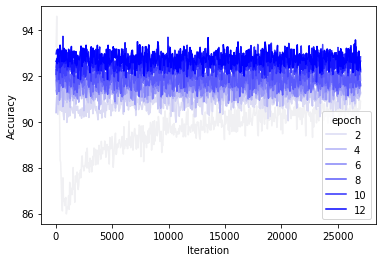

In [266]:
ax = sns.lineplot(data=train_df, x='iter', y='acc', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='Accuracy')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Training Accuracy')]

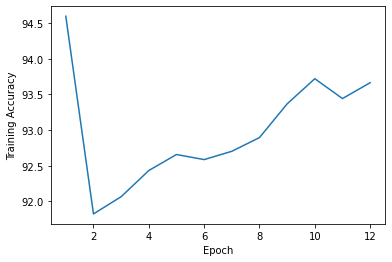

In [267]:
df = train_df.groupby(by=['epoch']).max()
ax = sns.lineplot(data=df, x='epoch', y='acc')
ax.set(xlabel='Epoch', ylabel='Training Accuracy')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Validation Recall')]

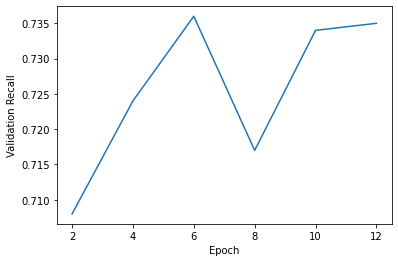

In [268]:
ax = sns.lineplot(data=val_df, x='epoch', y='Rcll')
ax.set(xlabel='Epoch', ylabel='Validation Recall')

# RPN classification loss

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '')]

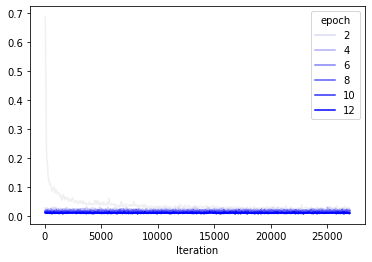

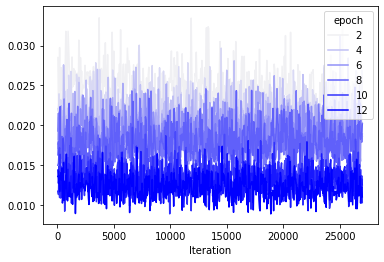

In [269]:
plt.figure()
ax = sns.lineplot(data=train_df, x='iter', y='loss_rpn_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')
plt.figure()
ax = sns.lineplot(data=train_df[train_df['epoch'] != 1], x='iter', y='loss_rpn_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')

# RPN regression loss

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '')]

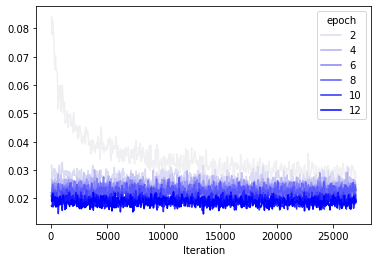

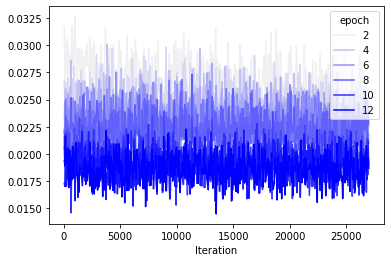

In [270]:
plt.figure()
ax = sns.lineplot(data=train_df, x='iter', y='loss_rpn_bbox', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')
plt.figure()
ax = sns.lineplot(data=train_df[train_df['epoch'] != 1], x='iter', y='loss_rpn_bbox', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')

# Classification Loss

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '')]

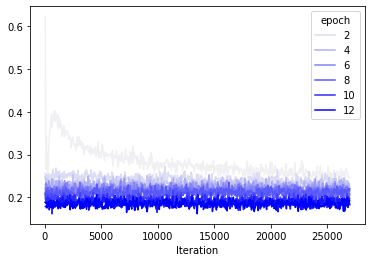

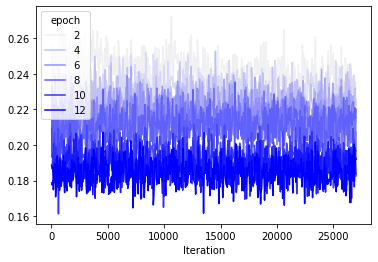

In [271]:
plt.figure()
ax = sns.lineplot(data=train_df, x='iter', y='loss_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')
plt.figure()
ax = sns.lineplot(data=train_df[train_df['epoch'] != 1], x='iter', y='loss_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')